<a href="https://colab.research.google.com/github/vpshilfiger37/Data-Science-Internship-Basics/blob/main/data_visualization_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week-2

Task-2

Data Visualization with Seaborn

Load a dataset (e.g., Iris dataset).

Create histograms and box plots for numerical columns.

Use Seaborn’s heatmap to visualize correlation.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


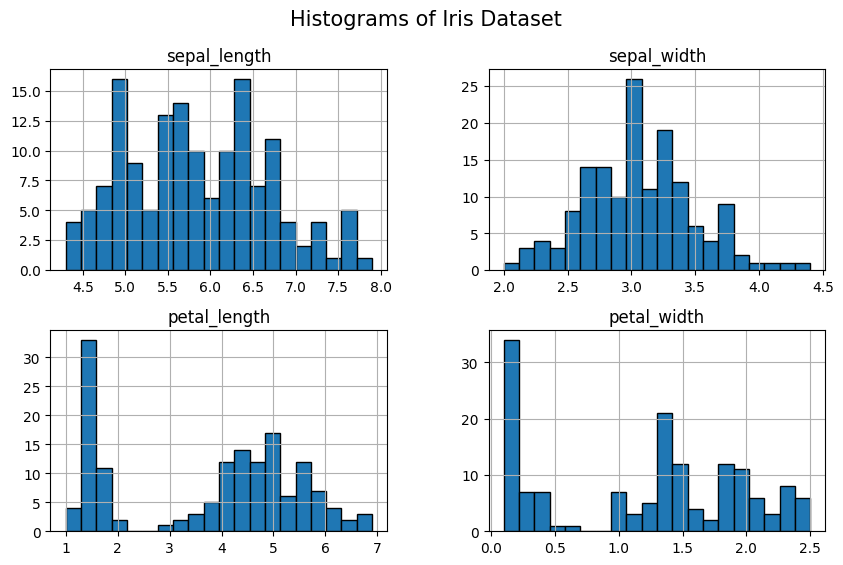

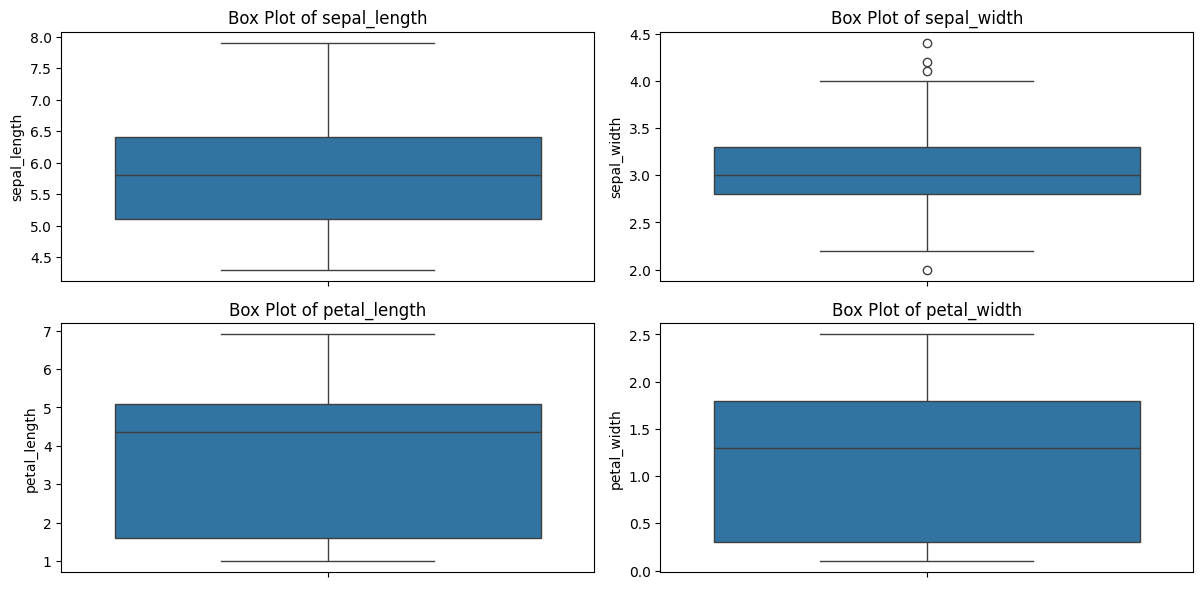

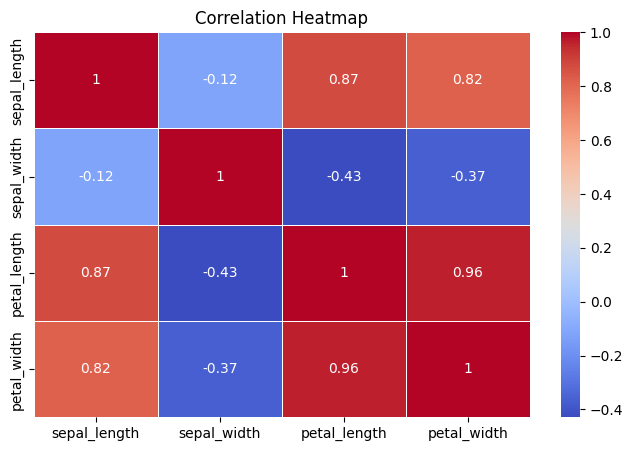

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
df = sns.load_dataset('iris')

# Display first few rows
print(df.head())

# -------------------------------------------
# HISTOGRAMS
# -------------------------------------------
df.hist(figsize=(10, 6), bins=20, edgecolor='black')
plt.suptitle('Histograms of Iris Dataset', fontsize=15)
plt.show()

# -------------------------------------------
# BOX PLOTS
# -------------------------------------------
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.select_dtypes(include=['float64']).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

# -------------------------------------------
# HEATMAP (CORRELATION MATRIX)
# -------------------------------------------
plt.figure(figsize=(8, 5))
# Calculate correlation only for numerical features
numeric_df = df.select_dtypes(include=['float64', 'int64']) # Select only numerical features
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          6

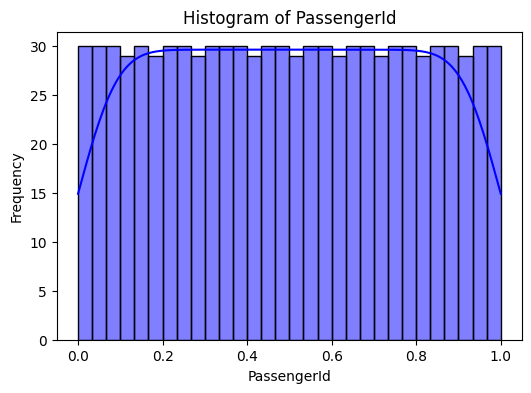

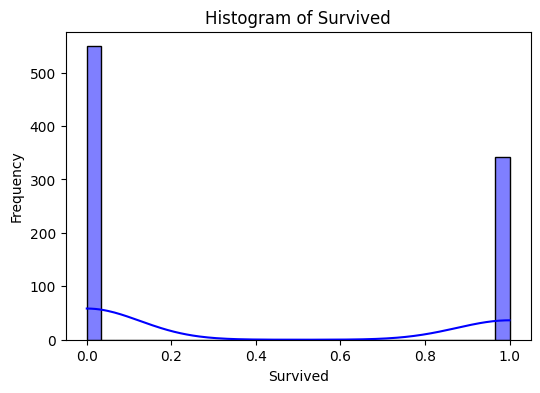

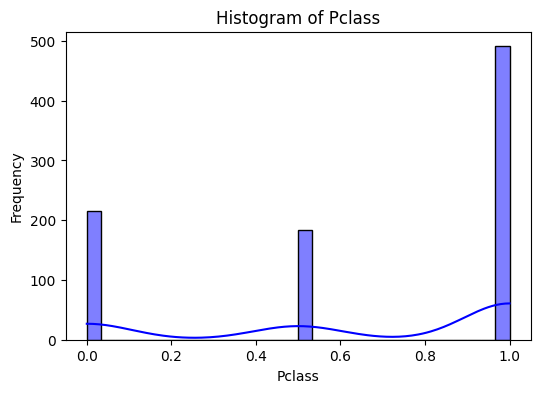

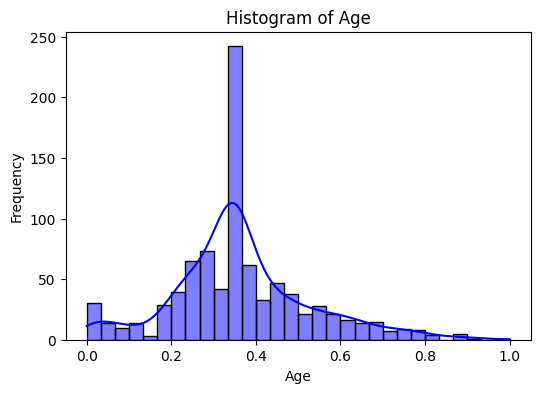

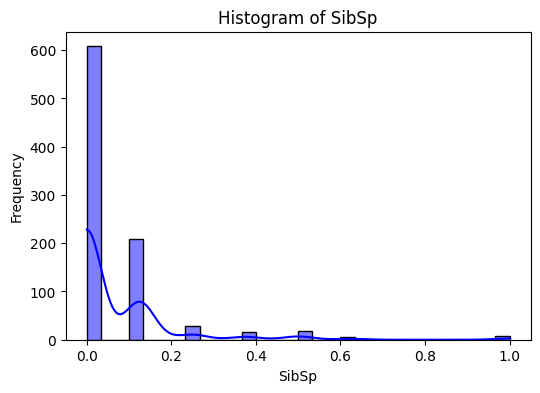

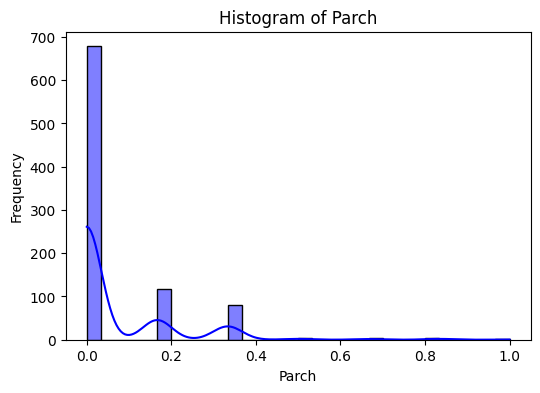

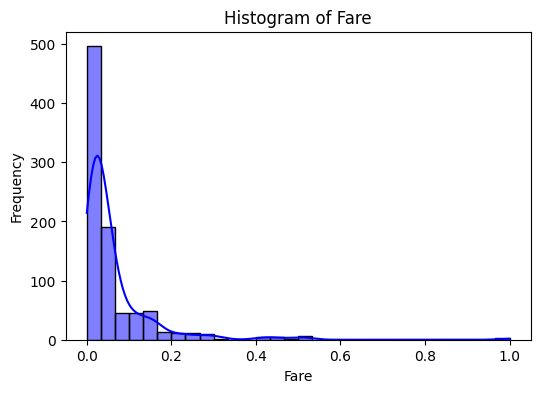

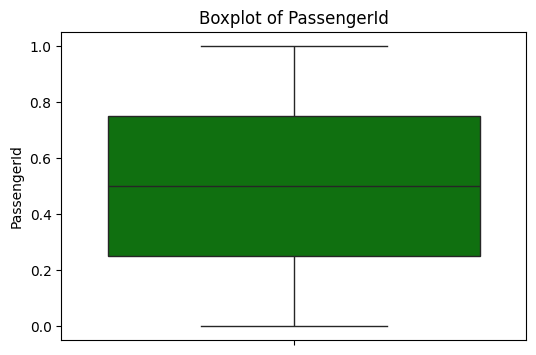

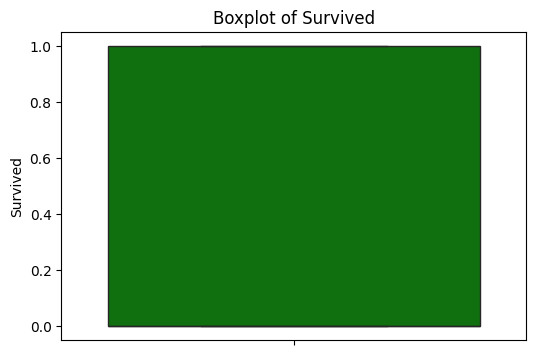

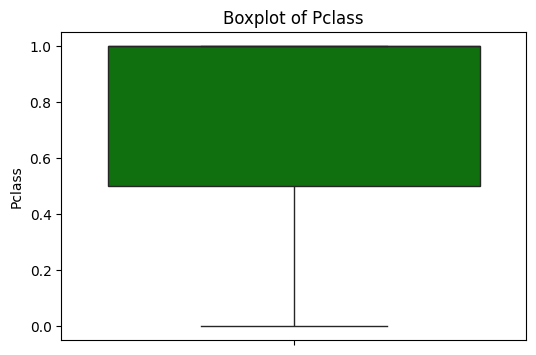

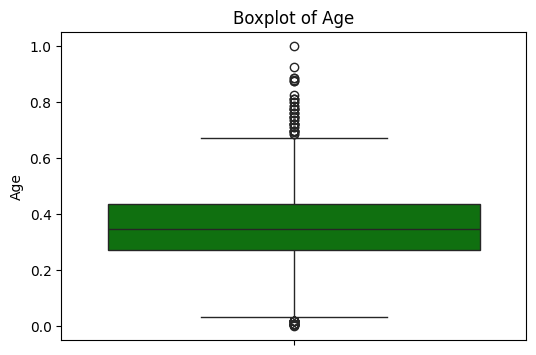

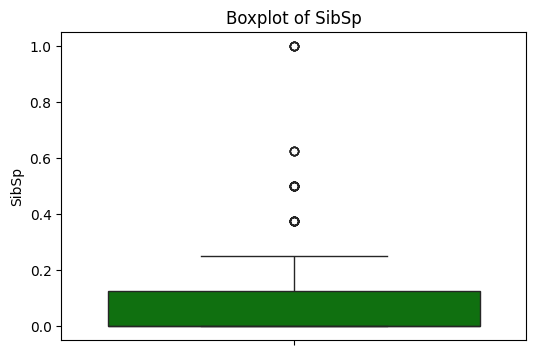

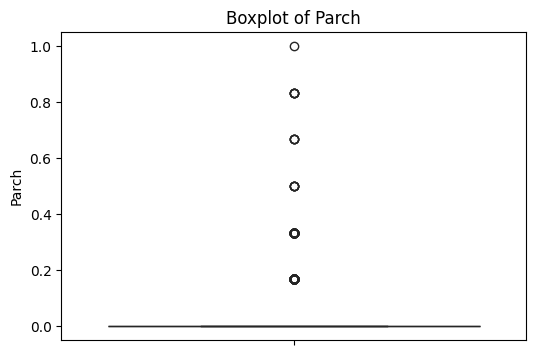

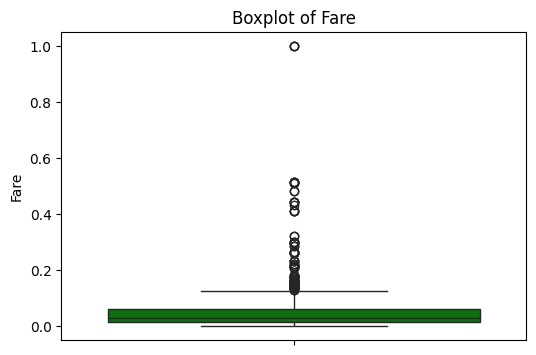

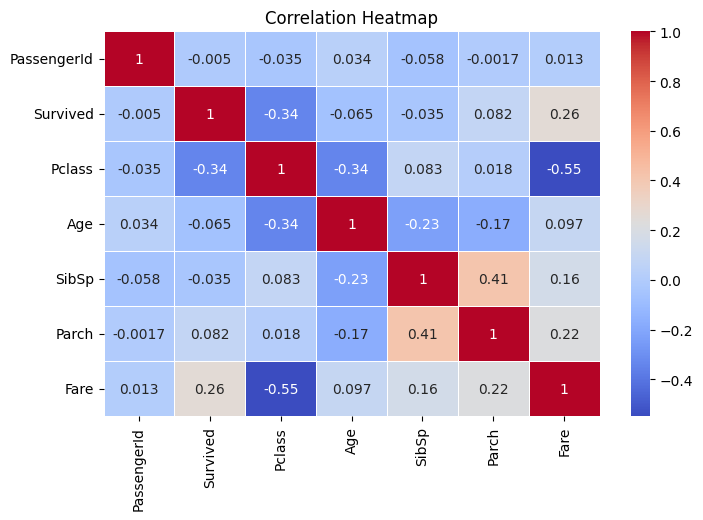

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os

# Check if file exists
file_path = "/content/Titanic-Dataset.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}. Please upload the dataset.")

# Load the dataset
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Information:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values
# Fill numerical columns with median
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.median()))

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=["object"]).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert categorical variables into numerical form (One-Hot Encoding)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalize numerical features
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Save the cleaned dataset
df.to_csv("/content/Titanic-Dataset-Cleaned.csv", index=False)
print("\nCleaned dataset saved as '/content/Titanic-Dataset-Cleaned.csv'")

# Data Visualization
# Histograms for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 5))
# Calculate correlation only for numerical features
numeric_df = df.select_dtypes(include=['float64', 'int64']) # Select only numerical features
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()